In [183]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import pygad
import tensorflow
import tensorflow.keras
import pygad.kerasga
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [135]:
# Alaska (Logs_Result)
df1 = pd.read_csv('Alaska (Logs_Result).txt', delimiter = "\t")
# Alaska_TOC-core
df2 = pd.read_csv('Alaska_TOC-core.txt', delimiter = "\t")
# Synthetic Well
df3 = pd.read_csv('Synthetic Well.txt', delimiter = "\t")
# TOC Vker Synth
df4 = pd.read_csv('TOC_Vker_SynthLog.txt', delimiter = "\t")
# hungarty
df5 = pd.read_csv('Datafull_Hu.txt', delimiter = "\t")
# Norway
df6 = pd.read_csv('Norway data.txt', delimiter = "\t")


In [184]:
X = df1[['ILD','NPHI','GR','RHOB','DT']].to_numpy()
Y = df1['TOCi'].to_numpy()
# sc = StandardScaler()
minmax = MinMaxScaler()
X_std =minmax.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.30, random_state=42)

In [185]:
X_std

array([[0.14376443, 0.46206891, 0.09630731, 0.84217214, 0.3304062 ],
       [0.14167599, 0.4660459 , 0.09839231, 0.84954701, 0.32767117],
       [0.14165396, 0.4731325 , 0.1013698 , 0.85880013, 0.32481404],
       ...,
       [0.98993485, 0.04165655, 0.13432213, 0.87926748, 0.04630502],
       [0.99562481, 0.04545573, 0.13299112, 0.88628328, 0.04504007],
       [1.        , 0.0507555 , 0.13209864, 0.89247045, 0.04421468]])

Generation = 1
Fitness    = 0.9074272670872338
Generation = 2
Fitness    = 0.9149945618319042
Generation = 3
Fitness    = 0.9234799021205242
Generation = 4
Fitness    = 0.9234799021205242
Generation = 5
Fitness    = 0.968887981164624
Generation = 6
Fitness    = 0.968887981164624
Generation = 7
Fitness    = 0.9710518246350854
Generation = 8
Fitness    = 0.9784732721563243
Generation = 9
Fitness    = 0.9973726244068358
Generation = 10
Fitness    = 1.0040111955386062
Generation = 11
Fitness    = 1.0061992176365127
Generation = 12
Fitness    = 1.0093658482481564
Generation = 13
Fitness    = 1.0111401677878542
Generation = 14
Fitness    = 1.0111401677878542
Generation = 15
Fitness    = 1.0111401677878542
Generation = 16
Fitness    = 1.0111401677878542
Generation = 17
Fitness    = 1.0121519308879363
Generation = 18
Fitness    = 1.0132548131855659
Generation = 19
Fitness    = 1.0137284406429112
Generation = 20
Fitness    = 1.0145660241517709
Generation = 21
Fitness    = 1.0145660241517709
Gen

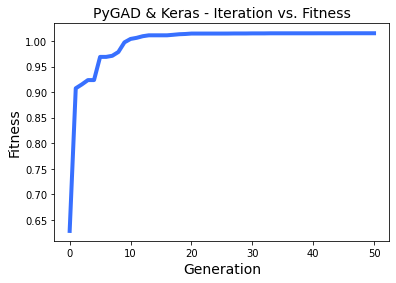

Fitness value of the best solution = 1.0151853380538307
Index of the best solution : 0
Predictions : 
 [[2.7914743]
 [2.644612 ]
 [2.7826006]
 [2.8257356]
 [2.7945967]
 [2.7988737]
 [2.7256153]
 [2.8595715]
 [2.8038783]
 [2.7838726]
 [2.711159 ]
 [2.7642546]
 [2.7730067]
 [2.9437912]
 [2.7541656]
 [2.7591376]
 [2.7607622]
 [2.7106085]
 [2.7600489]
 [2.6960459]
 [2.8015518]
 [2.7292023]
 [2.820434 ]
 [2.7751985]
 [2.7038364]
 [2.7761867]
 [2.706741 ]
 [2.784268 ]
 [2.8313127]
 [2.6790771]
 [2.6816125]
 [2.6792939]
 [2.678838 ]
 [2.7861867]
 [2.7163217]
 [2.6815941]
 [2.761069 ]
 [2.7106965]
 [2.7795267]
 [2.9079933]
 [2.7925737]
 [2.7590327]
 [2.6969848]
 [2.679963 ]
 [2.8025837]
 [2.7244153]
 [2.7189326]
 [2.7449245]
 [2.657098 ]
 [2.7941961]
 [2.8372555]
 [2.780717 ]
 [2.7887022]
 [2.6961248]
 [2.7653804]
 [2.8804753]
 [2.8216338]
 [2.9749956]
 [2.7631555]
 [2.6707668]
 [2.7935395]
 [2.972618 ]
 [2.7651732]
 [2.6886566]
 [2.7151656]
 [2.7074842]
 [2.8229208]
 [2.9108357]
 [2.7924623]


In [191]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    abs_error = mae(data_outputs, predictions).numpy() + 0.00000001
    solution_fitness = 1.0/abs_error

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

input_layer  = tensorflow.keras.layers.Input(5)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# # Data inputs
# data_inputs = numpy.array([[0.02, 0.1, 0.15],
#                            [0.7, 0.6, 0.8],
#                            [1.5, 1.2, 1.7],
#                            [3.2, 2.9, 3.1]])
data_inputs = X_train
data_outputs = y_train
test_inputs = X_test
# # Data outputs
# data_outputs = numpy.array([[0.1],
#                             [0.6],
#                             [1.3],
#                             [2.5]])

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 50 # Number of generations.
num_parents_mating = 2 # Number of solutions to be selected as parents in the mating pool.
initial_population = keras_ga.population_weights # Initial population of network weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Make prediction based on the best solution.
predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=data_inputs)
print("Predictions : \n", predictions)
test_pred = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=test_inputs)

mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error : ", abs_error)

In [192]:
print('Training Score : ', r2_score(y_train, predictions))
print ('Testing Score : ', r2_score(y_test, test_pred))

Training Score :  -0.07967985531976107
Testing Score :  -0.060296731196886943


# Adam

In [190]:
input_layer  = tensorflow.keras.layers.Input(5)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
output = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam")
history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)
pred_train = model.predict(X_train)
print('Training Result of syn',r2_score(y_train, pred_train))
pred_train = model.predict(X_test)
print('Training Result of syn',r2_score(y_test, pred_train))

Epoch 1/100
168/168 [==============================] - 1s 2ms/step - loss: 9.5095 - val_loss: 7.8749
Epoch 2/100
168/168 [==============================] - 0s 2ms/step - loss: 6.5197 - val_loss: 4.9374
Epoch 3/100
168/168 [==============================] - 0s 2ms/step - loss: 3.8327 - val_loss: 2.8305
Epoch 4/100
168/168 [==============================] - ETA: 0s - loss: 2.576 - 0s 2ms/step - loss: 2.5545 - val_loss: 2.2144
Epoch 5/100
168/168 [==============================] - 0s 2ms/step - loss: 2.1658 - val_loss: 1.9647
Epoch 6/100
168/168 [==============================] - 0s 2ms/step - loss: 1.9461 - val_loss: 1.7481
Epoch 7/100
168/168 [==============================] - 0s 2ms/step - loss: 1.7514 - val_loss: 1.5635
Epoch 8/100
168/168 [==============================] - 0s 2ms/step - loss: 1.5756 - val_loss: 1.3666
Epoch 9/100
168/168 [==============================] - 0s 2ms/step - loss: 1.4155 - val_loss: 1.2105
Epoch 10/100
168/168 [==============================] - 0s 2ms/step

168/168 [==============================] - 0s 2ms/step - loss: 0.1185 - val_loss: 0.1013
Epoch 82/100
168/168 [==============================] - 0s 2ms/step - loss: 0.1191 - val_loss: 0.1021
Epoch 83/100
168/168 [==============================] - 0s 1ms/step - loss: 0.1217 - val_loss: 0.1095
Epoch 84/100
168/168 [==============================] - 0s 2ms/step - loss: 0.1220 - val_loss: 0.1170
Epoch 85/100
168/168 [==============================] - 0s 2ms/step - loss: 0.1222 - val_loss: 0.1078
Epoch 86/100
168/168 [==============================] - 0s 1ms/step - loss: 0.1217 - val_loss: 0.1043
Epoch 87/100
168/168 [==============================] - 0s 2ms/step - loss: 0.1189 - val_loss: 0.1011
Epoch 88/100
168/168 [==============================] - 0s 2ms/step - loss: 0.1171 - val_loss: 0.1008
Epoch 89/100
168/168 [==============================] - 0s 1ms/step - loss: 0.1187 - val_loss: 0.1040
Epoch 90/100
168/168 [==============================] - 0s 2ms/step - loss: 0.1159 - val_loss: 